In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

In [2]:
A = img.imread("11.jpg")    #Representing the image as a matrix
A=A.astype("float64")
print(A.dtype)
print(A)             

float64
[[196. 191. 189. ... 194. 197. 203.]
 [192. 187. 185. ... 187. 190. 195.]
 [190. 185. 183. ... 188. 190. 196.]
 ...
 [127. 130. 132. ... 124. 130. 134.]
 [129. 131. 136. ... 146. 136. 139.]
 [141. 134. 131. ... 175. 131. 168.]]


In [3]:
e_vals,e_vecs=np.linalg.eig(A)
mag=[]
for i in e_vals:
    mag.append(np.abs(i))
i=np.argsort(mag)[::-1]
mag,e_vals,e_vecs=np.asarray(mag)[i], np.asarray(e_vals)[i], np.asarray(np.transpose(e_vecs))[i]


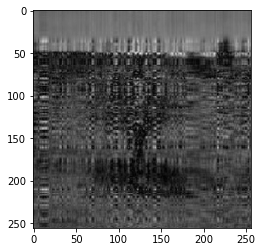

In [4]:
X=np.transpose(e_vecs)
X_inv=np.linalg.inv(X)
V=np.diag(e_vals)

Reconstructed_A=np.absolute(np.dot(X,np.dot(V,X_inv)))

for K in range(15,16,1):
    X_k=X[:,:K]
    X_inv_k=X_inv[:K,:]
    V_k=V[:K,:K]
    
    Reconstructed_A_k=np.absolute(np.dot(X_k,np.dot(V_k,X_inv_k)))
    plt.imshow(Reconstructed_A_k,cmap="gray")
    plt.show()


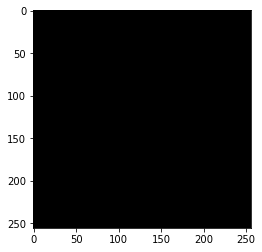

In [12]:
plt.imshow(abs(Reconstructed_A-A),cmap="gray", vmin=0, vmax=255)

In [ ]:
At_A=np.dot(np.transpose(A),A)
e_vals_1,e_vecs_1=np.linalg.eig(At_A)

i1=np.argsort(e_vals_1)[::-1]
e_vals_1,e_vecs_1= np.asarray(e_vals_1)[i1], np.asarray(np.transpose(e_vecs_1))[i1]
sqrt_e=np.sqrt(e_vals_1)
U=np.dot(A,np.transpose(e_vecs_1))/sqrt_e


In [ ]:
#U=np.transpose(e_vecs_1)
V_t=e_vecs_1
D=np.diag(np.sqrt(e_vals_1))
print(V_t.shape)

Reconstructed_A=np.absolute(np.dot(U,np.dot(D,V_t)))

plt.imshow(Reconstructed_A,cmap="gray")

In [ ]:
# U - 256x256,D - 256x256,V - 256x256
# U - 256Xk,D-kxk,V-kx256

In [ ]:
    """A_K=A[:,:K]
    B_K=B[:K,:K]
    C_K=C[:K,:]
    reconstructed_image=np.absolute(np.dot(A_K,np.dot(B_K,C_K)))"""

for low values of K, SVD has significantly lesser error than EVD as error decays exponentially for SVD and almost linearly for EVD.
SVD has a smooth curve that is monotonically decreasing whereas EVD has a curve which has lot of spikes and hence isnt smooth and is non monotonic.The overall trend for the error is still a decreasing trend for EVD too. 

def SVD(img):
    """Function that performs Singular value decomposition on input image
        img=U*S*V_t

    Inputs:
        img ([Matrix]): image to perform SVD on.

    Returns:
        U,S,V_t ([Matrices]): The 3 matrices that img is decomposed to.
    """
    At_A=np.dot(np.transpose(img),img)
    e_vals,e_vecs=np.linalg.eig(At_A)

    mag=[abs(v) for v in e_vals]
    mag,e_vals,e_vecs=[list(v) for v in zip(*sorted(zip(mag,e_vals,np.transpose(e_vecs)),reverse=True))]

    U=np.dot(img,np.transpose(e_vecs))/np.sqrt(e_vals)
    S=np.diag(np.sqrt(e_vals))
    V_t=np.conj(e_vecs)